# Física Nuclear y de Partículas #

## Tema 3. Modelos nucleares.  ##


César Fernández Ramírez\
Departamento de Física Interdisciplinar\
Universidad Nacional de Eduación a Distancia

Versión: Junio 2024

Contenidos:

- Fórmula semiempírica de masas (FSM)
- Comparación de la FSM con el experimento 



In [226]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 60*'-'

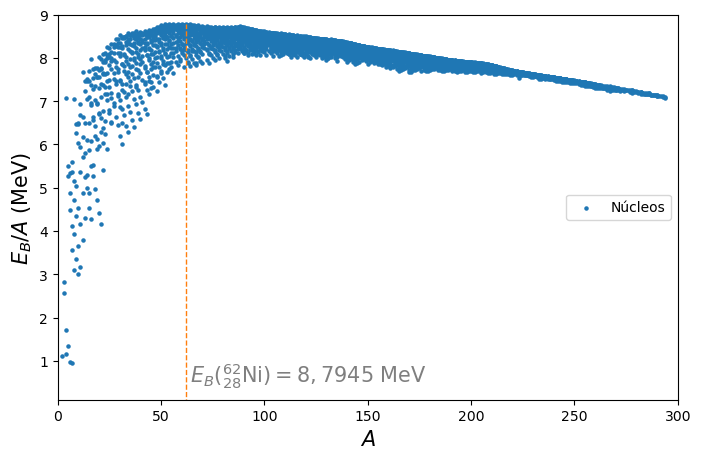

In [227]:
# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df = df[pd.to_numeric(df['binding'],errors='coerce').notna()]
df['binding'] /= 1000
df['A'] = df['n']+df['z']

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((0.1,9.))
plt.xlim((0.,300.))
plt.vlines(62,0.,df['binding'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(df['A'], df['binding'],marker='o',s=5,c=jpac_color[0],label='Núcleos')
plt.text(64,0.5,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()

## Fórmula Semiempírica de masas ##


$$ E_B / A = a_V - a_S / A^{1/3} - a_C * Z^2 / A^{4/3} - a_A * (A-2\, Z)^2/A^2 + \delta /A^{3/2}$$

donde 

$$    a_V, a_S, a_C, a_A = 15.75, 17.8, 0.711, 23.7 $$

y $\delta$

$$\begin{matrix} par-par \quad 11,18 \\ par-impar \quad 0 \\ impar-impar \quad -11,18 \end{matrix}$$


Parametrización de J. W. Rohlf, Modern Physics from α to Z0, Wiley (1994).

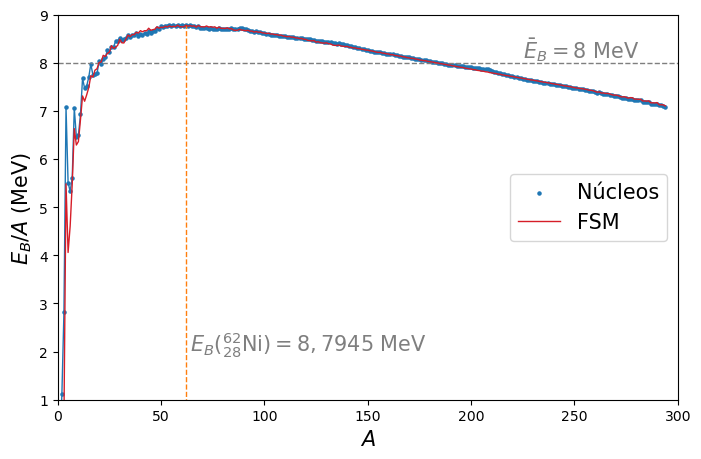

In [229]:
def FSM(Z,N):
    aV, aS, aC, aA, delta = 15.75, 17.8, 0.711, 23.7, 11.18
    Z, N = np.atleast_1d(Z), np.atleast_1d(N)
    A = Z + N
    sgn = np.zeros(Z.shape)
    sgn[(Z%2==0) & (N%2==0)] =  1.
    sgn[(Z%2!=0) & (N%2!=0)] = -1.
    return aV - aS / A**(1./3.) - aC * Z**2. / A**(4./3.) - aA * (A-2.*Z)**2./A**2. + sgn * delta/A**(3./2.)

gdf = df.groupby('A')
maxavEbind = gdf.apply(lambda t: t[t.binding==t.binding.max()])
maxavEbind['Eb'] = FSM(maxavEbind['z'], maxavEbind['n'])

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((1.,9.))
plt.xlim((0.,300.))
plt.hlines(8,0.,300.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines(62,0.,maxavEbind['Eb'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(maxavEbind['A'], maxavEbind['binding'],marker='o',s=5,c=jpac_color[0],label='Núcleos')
plt.plot(maxavEbind['A'], maxavEbind['binding'],'-',lw=1,c=jpac_color[0])
plt.plot(maxavEbind['A'], maxavEbind['Eb'],'-',lw=1,c=jpac_color[1],label='FSM')
plt.text(225,8.1,r'$\bar{E}_B=8$ MeV',c=jpac_color[9],fontsize=15)
plt.text(64,2,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True,prop={'size': 15})
plt.show() 
#fig.savefig('FSM.pdf', bbox_inches='tight')   

### Diferencia entre la FSM y los datos experimentales ###

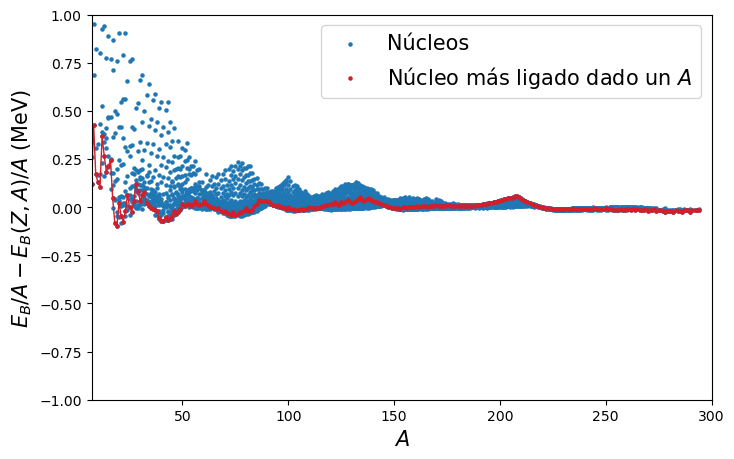

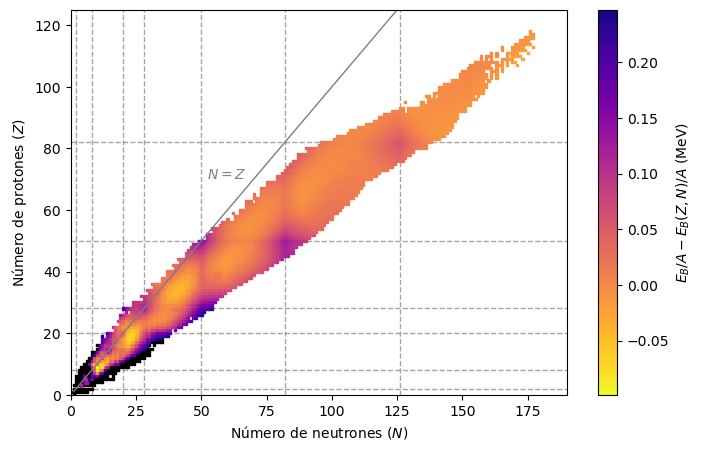

In [233]:
df['diff'] = df['binding'] - FSM(df['z'],df['n'])
df1 = df.loc[ ( (df['diff'] < .25) &  (df['diff'] > -0.1) ) ]
df2 = df.loc[ ( df['diff'] <= -.1 ) ]
df3 = df.loc[ ( df['diff'] >=  .25 ) ]

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A-E_B(Z,A)/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((-1.,1.))
plt.xlim((7.,300.))
plt.scatter(df['A'], df['binding']-FSM(df['z'],df['n']),marker='o',s=5,c=jpac_color[0],label='Núcleos')
plt.scatter(maxavEbind['A'], maxavEbind['binding']-maxavEbind['Eb'],marker='o',s=5,c=jpac_color[1],label='Núcleo más ligado dado un $A$')
plt.plot(maxavEbind['A'], maxavEbind['binding']-maxavEbind['Eb'],'-',lw=1,c=jpac_color[1])
plt.legend(loc='upper right',ncol=1,frameon=True,prop={'size': 15})
plt.show()
#fig.savefig('diffFSM.pdf', bbox_inches='tight') 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,190))
ax.set_ylim((0,125))
x = np.linspace(1,125,125)
ax.hlines( [2,8,20,28,50,82,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed', alpha=0.7, zorder=0)
ax.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed', alpha=0.7, zorder=0)
ax.plot(x,x,'-',lw=1,color=jpac_color[9])
#ax.text(60,25,r'Experimento$-$FSM',c=jpac_color[10],fontsize=10)
ax.text(52,70,r'$N=Z$',c=jpac_color[9],fontsize=10)
ax.scatter(df2['n'],df2['z'],marker='s',s=2.5, c=jpac_color[7])
ax.scatter(df3['n'],df3['z'],marker='s',s=2.5, c=jpac_color[10])
pa = ax.scatter(df1['n'],df1['z'],marker='s',s=2.5, c=df1['diff'], cmap='plasma_r')
fig.colorbar(pa,ax=ax,orientation='vertical',label=r'$E_B/A-E_B(Z,N)/A$ (MeV)')
plt.show() 
#fig.savefig('CartaNuclearEBIAEA.pdf', bbox_inches='tight')   

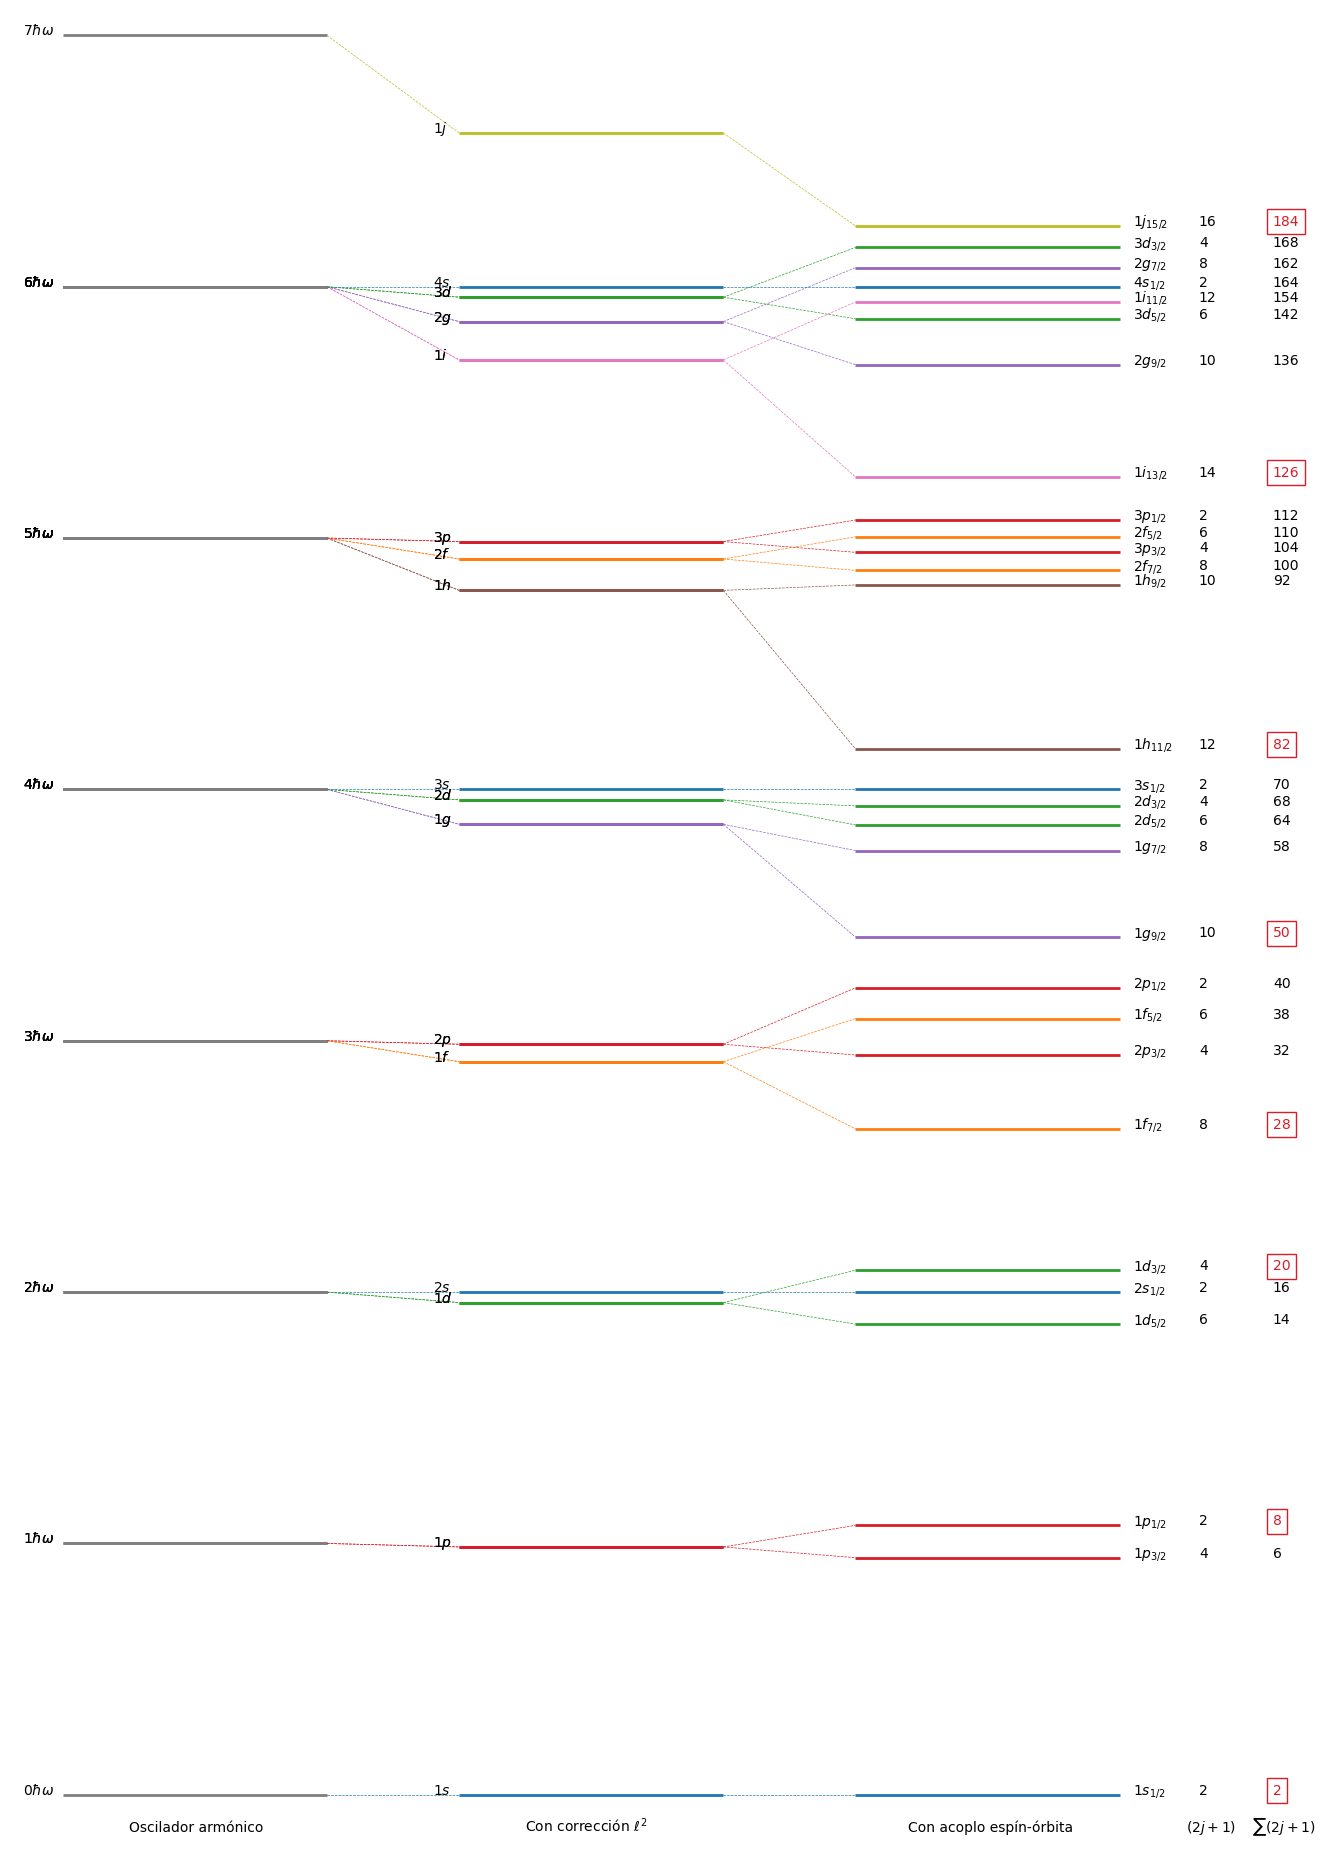

In [225]:
A = 184
hbarw = 41./(float(A)**(1/3))
a, b = -20.*float(A)**(-2/3), -0.05
numeros_magicos = [2,8,20,28,50,82,126,184]

def HO(hbarw: float, n:int , l: int):
    N = 2*n -2 + l
    if l>N: 
        return 0.
    else:
        return hbarw*(float(N)+3./2.)
    
def El(b: float, l: int):
    return b*float(l*(l+1))

def Ej(a: float, l: int, j: int):
    if j==(2*l+1):
        return a*float(l)/2
    elif j==(2*l-1):
        return -a*float(l+1)/2.
    else:
        return 0.

def shell_energy(hbarw: float, a: float, b:float, n: int, l:int, j: int):
   return HO(hbarw, n, l) +  El(b, l) + Ej(a, l, j)

def plotlevel(x0, x1, y, N, nombre0, N1, N2):
    plt.hlines(y, x0, x1, colors=jpac_color[N], lw=2., linestyles='solid')
    plt.text(x1+0.05,y,nombre0)
    plt.text(x1+0.3,y,str(N1))
    if N2 in numeros_magicos:
        plt.text(x1+0.58,y,str(N2), color=jpac_red, bbox=dict(facecolor='none', edgecolor=jpac_red))
    else:
        plt.text(x1+0.58,y,str(N2))

def plotlevelHO(x0, x1, y, N, N1):
    plt.hlines(y, x0, x1, colors=jpac_color[N], lw=2., linestyles='solid')
    if N1 in [0,1,2,3,4,5,6,7]:
        texto = str(N1) + '$\hbar \omega$'
        plt.text(x0-0.15,y,texto)
    else:
        plt.text(x0-0.1,y,str(N1))

def plotdashed(x0, x1, y0, y1, N):
    x, y = [x0, x1], [y0, y1]
    plt.plot(x, y, '--', c=jpac_color[N], lw=0.5)

# n, l, 2j, nl, nls, degeneracion, desplazamiento
niveles = [ [1,  0,  1, r'$1s$', r'$1s_{1/2}$',   2,  0.],  #1s1/2
            [1,  1,  3, r'$1p$', r'$1p_{3/2}$',   4,  0.],  #1p3/2
            [1,  1,  1, r'$1p$', r'$1p_{1/2}$',   2,  0.],  #1p1/2
            [1,  2,  5, r'$1d$', r'$1d_{5/2}$',   6,  0.],  #1d5/2
            [2,  0,  1, r'$2s$', r'$2s_{1/2}$',   2,  0.],  #2s1/2
            [1,  2,  3, r'$1d$', r'$1d_{3/2}$',   4,  0.],  #1d3/2
            [1,  3,  7, r'$1f$', r'$1f_{7/2}$',   8, -1.],  #1f7/2  
            [2,  1,  3, r'$2p$', r'$2p_{3/2}$',   4,  0.],  #2p3/2
            [1,  3,  5, r'$1f$', r'$1f_{5/2}$',   6,  0.],  #1f5/2
            [2,  1,  1, r'$2p$', r'$2p_{1/2}$',   2,  1.],  #2p1/2
            [1,  4,  9, r'$1g$', r'$1g_{9/2}$',  10, -2.],  #1g9/2
            [1,  4,  7, r'$1g$', r'$1g_{7/2}$',   8, -2.3],  #1g7/2            
            [2,  2,  5, r'$2d$', r'$2d_{5/2}$',   6, -0.1],  #2d5/2
            [2,  2,  3, r'$2d$', r'$2d_{3/2}$',   4, -1.1],  #2d3/2
            [3,  0,  1, r'$3s$', r'$3s_{1/2}$',   2,  0.],  #3s1/2
            [1,  5, 11, r'$1h$', r'$1h_{11/2}$', 12, -3.],  #1h11/2
            [1,  5,  9, r'$1h$', r'$1h_{9/2}$',  10, -1.7],  #1h9/2
            [2,  3,  7, r'$2f$', r'$2f_{7/2}$',   8,  0.6],  #2f7/2
            [3,  1,  3, r'$3p$', r'$3p_{3/2}$',   4,  0.],  #3p3/2
            [2,  3,  5, r'$2f$', r'$2f_{5/2}$',   6, -0.6],  #2f5/2
            [3,  1,  1, r'$3p$', r'$3p_{1/2}$',   2,  0.],  #3p1/2
            [1,  6, 13, r'$1i$', r'$1i_{13/2}$', 14, -1.5],  #1i13/2
            [2,  4,  9, r'$2g$', r'$2g_{9/2}$',  10,  0.],  #2g9/2
            [3,  2,  5, r'$3d$', r'$3d_{5/2}$',   6,  0.],  #3d5/2
            [1,  6, 11, r'$1i$', r'$1i_{11/2}$', 12,  -0.5],  #1i11/2
            [2,  4,  7, r'$2g$', r'$2g_{7/2}$',   8,  0.],  #2g7/2
            [4,  0,  1, r'$4s$', r'$4s_{1/2}$',   2,  0.],  #4s1/2
            [3,  2,  3, r'$3d$', r'$3d_{3/2}$',   4,  0.5],  #3d3/2
            [1,  7, 15, r'$1j$', r'$1j_{15/2}$', 16,  -0.5] ] #1j15/2

niveles_acumulado = []
energias = np.zeros((len(niveles),3))
for count, x in enumerate(niveles):
    n, l, j, nhol, nombre, degeneracion, shift = x
    N = int(2*n - 2 + l)
    if count==0:
        niveles_acumulado.append(degeneracion)
    else:
        niveles_acumulado.append(niveles_acumulado[count-1] + degeneracion)

    energias[count, 0], energias[count, 1], energias[count, 2] = HO(hbarw, n, l), HO(hbarw, n, l) + El(b, l), shell_energy(hbarw,a,b,n,l,j)
#    print(n, l, j, nombre, energias[count, 0], energias[count, 1], energias[count, 2])
#print(niveles_acumulado)

fig = plt.figure(figsize=(15,24))
plt.axis('off')
for count, x in enumerate(niveles):
    n, l, j, nhol, nombre, degeneracion, shift = x
    N = int(2*n - 2 + l)
    yho, yl, ysm = energias[count, 0], energias[count, 1], energias[count, 2] + shift
    plotlevelHO(1, 2, yho , 9, N)
    plotdashed(2, 2.5, yho, yl, l)
    plotlevelHO(2.5, 3.5, yl , l, nhol)
    plotdashed(3.5, 4, yl, ysm, l)
    plotlevel(4, 5, ysm, l, nombre, degeneracion, niveles_acumulado[count])

plt.ylim((9,62))

plt.text(1.25, 9.75, 'Oscilador armónico')
plt.text(2.75, 9.75, 'Con corrección ${\ell}^2$')
plt.text(4.2,  9.75, 'Con acoplo espín-órbita')
plt.text(5.25,  9.75, '$(2j+1)$')
plt.text(5.5,  9.75, '$\sum (2j+1)$')
plt.show()
#fig.savefig('ModeloCapas.pdf', bbox_inches='tight')   